In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/modified_flight_data 2.csv')
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,01-15-2023,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


# Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458869 entries, 0 to 458868
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date of Booking  458869 non-null  object
 1   Date of Journey  458869 non-null  object
 2   Airline-Class    449698 non-null  object
 3   Departure Time   449704 non-null  object
 4   Arrival Time     449710 non-null  object
 5   Duration         449719 non-null  object
 6   Total Stops      449690 non-null  object
 7   Price            449697 non-null  object
dtypes: object(8)
memory usage: 28.0+ MB


In [ ]:
df.describe()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
count,458869,458869,449698,449704,449710,449719,449690,449697
unique,4,196,1836,1010,1050,481,13,20683
top,15/01/2023,31/01/2023,Vistara \nUK-936\nECONOMY,20:30\nHyderabad,19:50\nChennai,02h 15m,1-stop,"54,879"
freq,334975,7176,2269,5740,5043,4958,364984,2690


In [ ]:
df.isna().sum()

Date of Booking       0
Date of Journey       0
Airline-Class      9171
Departure Time     9165
Arrival Time       9159
Duration           9150
Total Stops        9179
Price              9172
dtype: int64

## Extractions & Transformations in ETL

In [ ]:
df['Date of Booking'].unique()

array(['15/01/2023', '01-15-2023', '2023-01-15', '15-01-2023'],
      dtype=object)

In [ ]:
df['Date of Booking'] = pd.to_datetime('2023-01-15')

In [ ]:
df = df.drop_duplicates()

In [ ]:
def clean_and_convert(x):
    if pd.isna(x):
        return np.nan
    return int(x.replace(',', ''))

# Apply the function to the DataFrame column
df['Price'] = df['Price'].apply(clean_and_convert)

In [ ]:
df["Company"] = df["Airline-Class"].str.split("\n").str[0]
df["Flight_Route"] = df["Airline-Class"].str.split("\n").str[1]
df["Ticket_Class"] = df["Airline-Class"].str.split("\n").str[2]
df["Departure_Location"] = df["Departure Time"].str.split("\n").str[1]
df["Departure_Time"] = df["Departure Time"].str.split("\n").str[0]
df["Arrival_Location"] = df["Arrival Time"].str.split("\n").str[1]
df["Arrival_Time"] = df["Arrival Time"].str.split("\n").str[0]
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Company,Flight_Route,Ticket_Class,Departure_Location,Departure_Time,Arrival_Location,Arrival_Time
0,2023-01-15,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,5335.0,SpiceJet,SG-8169,ECONOMY,Delhi,20:00,Mumbai,22:05
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,5899.0,Indigo,6E-2519,ECONOMY,Delhi,23:00,Mumbai,01:20
2,2023-01-15,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,5801.0,GO FIRST,G8- 354,ECONOMY,Delhi,22:30,Mumbai,00:40
3,2023-01-15,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,5794.0,SpiceJet,SG-8709,ECONOMY,Delhi,18:50,Mumbai,20:55
4,2023-01-15,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,5955.0,Air India,AI-805,ECONOMY,Delhi,20:00,Mumbai,22:10


In [ ]:
date_formats = ['%d-%m-%Y', '%d/%m/%Y','%m-%d-%Y','%Y-%m-%d']

# Function to parse dates
def parse_journey_date(date_str):
    if pd.isnull(date_str):
        return pd.NaT
    for fmt in date_formats:
        try:
            parsed_date = pd.to_datetime(date_str, format=fmt)
            if parsed_date > pd.Timestamp('15-01-2023') and parsed_date < pd.Timestamp('20-03-2023'):
              return parsed_date
        except ValueError:
            continue
    # If none of the formats match
    return pd.NaT

df['Date of Journey'] = df['Date of Journey'].apply(parse_journey_date)

In [ ]:
category_percentage = df['Duration'].value_counts(normalize=True) * 100
category_percentage_df = category_percentage.reset_index()
category_percentage_df.columns = ['Duration', 'Percentage']
print(category_percentage_df)

    Duration  Percentage
0    02h 15m    1.109206
1    02h 10m    0.814909
2    06h 15m    0.770866
3    06h 40m    0.765445
4    06h 20m    0.753248
..       ...         ...
476  39h 25m    0.000226
477  38h 10m    0.000226
478  39h 55m    0.000226
479  40h 05m    0.000226
480  30h 50m    0.000226

[481 rows x 2 columns]


In [ ]:
def convert_to_timedelta(duration):
    if pd.isnull(duration):
        return np.nan
    parts = duration.split(' ')
    hours = int(parts[0].replace('h', ''))
    minutes = int(parts[1].replace('m', ''))
    return pd.Timedelta(hours=hours, minutes=minutes)

# Apply the conversion function
df['Duration'] = df['Duration'].apply(convert_to_timedelta)

In [ ]:
def combine_datetime(row):
    if pd.isna(row['Departure_Time']):
        return row['Date of Journey']
    else:
        return pd.to_datetime(row['Date of Journey'].strftime('%Y-%m-%d') + ' ' + row['Departure_Time'])

df['Journey DateTime'] = df.apply(combine_datetime, axis=1)

In [ ]:
df['Arrival_Time'] = df['Arrival_Time'].fillna('Missing')

def convert_arrival_time(row):
    journey_dt = row['Journey DateTime']
    duration = row['Duration']
    arrival_time = row['Arrival_Time']

    if pd.notnull(duration):
        arrival_dt = journey_dt + duration

    else:
        if arrival_time == 'Missing':
            return pd.NaT

        arrival_dt = pd.to_datetime(f"{journey_dt.date()} {arrival_time}", format="%Y-%m-%d %H:%M")
        if arrival_dt < journey_dt:
            arrival_dt += DateOffset(days=1)
    return arrival_dt

df['Arrival DateTime'] = df.apply(convert_arrival_time, axis=1)

In [ ]:
# Function to calculate duration if it's missing
def calculate_duration(row):
    if pd.isna(row['Duration']):
        if pd.notna(row['Journey DateTime']) and pd.notna(row['Arrival DateTime']):
            return row['Arrival DateTime'] - row['Journey DateTime']
        else:
            return pd.NaT
    else:
        return row['Duration']

df['Duration'] = df.apply(calculate_duration, axis=1)

In [ ]:
reference_date = pd.to_datetime('2023-01-15')
df['DaysTillJourney'] = (df['Journey DateTime'] - reference_date).dt.days

In [ ]:
df.drop(columns=["Airline-Class", "Departure_Time", "Date of Journey","Arrival_Time"], inplace=True)
df.head()

,Date of Booking,Departure Time,Arrival Time,Duration,Total Stops,Price,Company,Flight_Route,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney
0,2023-01-15,20:00\nDelhi,22:05\nMumbai,0 days 02:05:00,non-stop,5335.0,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1
1,2023-01-15,23:00\nDelhi,01:20\nMumbai,0 days 02:20:00,non-stop,5899.0,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1
2,2023-01-15,22:30\nDelhi,00:40\nMumbai,0 days 02:10:00,non-stop,5801.0,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1
3,2023-01-15,18:50\nDelhi,20:55\nMumbai,0 days 02:05:00,non-stop,5794.0,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1
4,2023-01-15,20:00\nDelhi,22:10\nMumbai,0 days 02:10:00,non-stop,5955.0,Air India,AI-805,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1


In [ ]:
df.drop(columns=["Departure Time","Arrival Time"], inplace=True)
df.head()

,Date of Booking,Duration,Total Stops,Price,Company,Flight_Route,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney
0,2023-01-15,0 days 02:05:00,non-stop,5335.0,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1
1,2023-01-15,0 days 02:20:00,non-stop,5899.0,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1
2,2023-01-15,0 days 02:10:00,non-stop,5801.0,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1
3,2023-01-15,0 days 02:05:00,non-stop,5794.0,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1
4,2023-01-15,0 days 02:10:00,non-stop,5955.0,Air India,AI-805,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451832 entries, 0 to 458868
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Date of Booking     451832 non-null  datetime64[ns] 
 1   Duration            451653 non-null  timedelta64[ns]
 2   Total Stops         442730 non-null  object         
 3   Price               442733 non-null  float64        
 4   Company             442738 non-null  object         
 5   Flight_Route        442738 non-null  object         
 6   Ticket_Class        442738 non-null  object         
 7   Departure_Location  442739 non-null  object         
 8   Arrival_Location    442739 non-null  object         
 9   Journey DateTime    451832 non-null  datetime64[ns] 
 10  Arrival DateTime    451653 non-null  datetime64[ns] 
 11  DaysTillJourney     451832 non-null  int64          
dtypes: datetime64[ns](3), float64(1), int64(1), object(6), timedelta64[ns](1)
mem

In [ ]:
df.head()

,Date of Booking,Duration,Total Stops,Price,Company,Flight_Route,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney
0,2023-01-15,0 days 02:05:00,non-stop,5335.0,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1
1,2023-01-15,0 days 02:20:00,non-stop,5899.0,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1
2,2023-01-15,0 days 02:10:00,non-stop,5801.0,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1
3,2023-01-15,0 days 02:05:00,non-stop,5794.0,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1
4,2023-01-15,0 days 02:10:00,non-stop,5955.0,Air India,AI-805,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1


In [ ]:
df.columns

Index(['Date of Booking', 'Duration', 'Total Stops', 'Price', 'Company',
       'Flight_Route', 'Ticket_Class', 'Departure_Location',
       'Arrival_Location', 'Journey DateTime', 'Arrival DateTime',
       'DaysTillJourney'],
      dtype='object')

In [ ]:
df['Company'] = df['Company'].str.strip()
df['Company'].unique()

array(['SpiceJet', 'Indigo', 'GO FIRST', 'Air India', 'AirAsia', nan,
       'Vistara', 'AkasaAir', 'AllianceAir', 'StarAir'], dtype=object)

In [ ]:
df.head()

,Date of Booking,Duration,Total Stops,Price,Company,Flight_Route,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney
0,2023-01-15,0 days 02:05:00,non-stop,5335.0,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1
1,2023-01-15,0 days 02:20:00,non-stop,5899.0,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1
2,2023-01-15,0 days 02:10:00,non-stop,5801.0,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1
3,2023-01-15,0 days 02:05:00,non-stop,5794.0,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1
4,2023-01-15,0 days 02:10:00,non-stop,5955.0,Air India,AI-805,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1


#**Data Preprocessing**

1.   Dropping Irrelevant Columns
2.   Removing Rows with missing target values
3.   Filling Out Categorical Missing Values
4.   Grouping Together Time data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451832 entries, 0 to 458868
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Date of Booking     451832 non-null  datetime64[ns] 
 1   Duration            451653 non-null  timedelta64[ns]
 2   Total Stops         442730 non-null  object         
 3   Price               442733 non-null  float64        
 4   Company             442738 non-null  object         
 5   Flight_Route        442738 non-null  object         
 6   Ticket_Class        442738 non-null  object         
 7   Departure_Location  442739 non-null  object         
 8   Arrival_Location    442739 non-null  object         
 9   Journey DateTime    451832 non-null  datetime64[ns] 
 10  Arrival DateTime    451653 non-null  datetime64[ns] 
 11  DaysTillJourney     451832 non-null  int64          
dtypes: datetime64[ns](3), float64(1), int64(1), object(6), timedelta64[ns](1)
mem

In [ ]:
df.isna().sum()

Duration                 0
Total Stops           8912
Price                    0
Company               8896
Ticket_Class          8896
Departure_Location    8903
Arrival_Location      8733
Journey DateTime         0
Arrival DateTime         0
DaysTillJourney          0
dtype: int64

## 1. Drop Irrelevant Columns & some rows

In [ ]:
df.drop(columns=['Date of Booking','Flight_Route'],inplace=True)

In [ ]:
df.dropna(subset=["Price","Duration"], inplace=True)

## 2. Imputation

In [ ]:
category_percentage = df['Total Stops'].value_counts(normalize=True) * 100

category_percentage_df = category_percentage.reset_index()
category_percentage_df.columns = ['Total Stops', 'Percentage']

print(category_percentage_df)

                                     Total Stops  Percentage
0                                         1-stop   81.426743
1                                       non-stop   11.526248
2                                        2+-stop    6.455972
3        1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR    0.325612
4     1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore    0.071256
5      1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi    0.061340
6       1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune    0.059265
7   1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati    0.018679
8        1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR    0.017987
9        1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ    0.014297
10    1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai    0.010608
11       1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ    0.010147
12       1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB    0.001845


In [ ]:
df['Total Stops'] = df['Total Stops'].str.replace('\n', '').str.replace('\t', '')
df['Total Stops'] = df['Total Stops'].fillna('Missing')


category_counts = df['Total Stops'].value_counts(normalize=True)

# Identify categories that account for less than 0.5%
threshold = 0.005
infrequent_categories = category_counts[category_counts < threshold].index

# Replace infrequent categories with 'Other'
df['Total Stops'] = df['Total Stops'].apply(lambda x: '1-stop' if x in infrequent_categories else x)


category_percentage = df['Total Stops'].value_counts(normalize=True) * 100
category_percentage_df = category_percentage.reset_index()
category_percentage_df.columns = ['Total Stops', 'Percentage']
print(category_percentage_df)

  Total Stops  Percentage
0      1-stop   80.366145
1    non-stop   11.294138
2     2+-stop    6.325965
3     Missing    2.013752


In [ ]:
df['Company'] = df['Company'].fillna('Missing')
category_percentage = df['Company'].value_counts(normalize=True) * 100

category_percentage_df  = category_percentage.reset_index()
category_percentage_df.columns = ['Company', 'Percentage']

print(category_percentage_df)

       Company  Percentage
0      Vistara   49.960570
1    Air India   26.029641
2       Indigo   14.326516
3      AirAsia    3.446110
4     GO FIRST    2.354499
5      Missing    2.010137
6     SpiceJet    1.285484
7     AkasaAir    0.486265
8  AllianceAir    0.087220
9      StarAir    0.013558


In [ ]:
df['Ticket_Class'] = df['Ticket_Class'].fillna('Missing')
category_percentage = df['Ticket_Class'].value_counts(normalize=True) * 100

category_percentage_df  = category_percentage.reset_index()
category_percentage_df.columns = ['Ticket_Class', 'Percentage']

print(category_percentage_df)

     Ticket_Class  Percentage
0         ECONOMY   54.627314
1        BUSINESS   27.680954
2  PREMIUMECONOMY   15.649510
3         Missing    2.010137
4           FIRST    0.032086


In [ ]:
df['Departure_Location'] = df['Departure_Location'].fillna('Missing')
category_percentage = df['Departure_Location'].value_counts(normalize=True) * 100

category_percentage_df  = category_percentage.reset_index()
category_percentage_df.columns = ['Departure_Location', 'Percentage']

print(category_percentage_df)

  Departure_Location  Percentage
0              Delhi   18.076316
1             Mumbai   17.520229
2          Bangalore   15.957041
3          Hyderabad   12.285649
4            Chennai   12.267120
5            Kolkata   11.999358
6          Ahmedabad    9.882569
7            Missing    2.011718


In [ ]:
df['Arrival_Location'] = df['Arrival_Location'].fillna('Missing')
category_percentage = df['Arrival_Location'].value_counts(normalize=True) * 100

category_percentage_df  = category_percentage.reset_index()
category_percentage_df.columns = ['Arrival_Location', 'Percentage']

print(category_percentage_df)



  Arrival_Location  Percentage
0           Mumbai   17.984802
1            Delhi   16.860427
2        Bangalore   15.745768
3        Hyderabad   13.592373
4          Chennai   12.509123
5          Kolkata   11.777918
6        Ahmedabad    9.556283
7          Missing    1.973305


In [ ]:
df.isna().sum()

Duration              0
Total Stops           0
Price                 0
Company               0
Ticket_Class          0
Departure_Location    0
Arrival_Location      0
Journey DateTime      0
Arrival DateTime      0
DaysTillJourney       0
dtype: int64

In [ ]:
bins = {
    (0, 6): 'Night',
    (6, 12): 'Morning',
    (12, 18): 'Afternoon',
    (18, 24): 'Evening'
}

# Function to categorize datetime into time of day bins
def categorize_time(dt):
    hour = dt.hour
    for (start, end), label in bins.items():
        if start <= hour < end:
            return label
    return None

# Apply the categorization function to create a new column
df['JourneyTime'] = df['Journey DateTime'].apply(categorize_time)
df['ArrivalTime'] = df['Arrival DateTime'].apply(categorize_time)
df.drop(columns=['Journey DateTime',"Arrival DateTime"],inplace =True)
df.head()

,Duration,Total Stops,Price,Company,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney,JourneyTime,ArrivalTime
0,0 days 02:05:00,non-stop,5335.0,SpiceJet,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1,Evening,Evening
1,0 days 02:20:00,non-stop,5899.0,Indigo,ECONOMY,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1,Evening,Night
2,0 days 02:10:00,non-stop,5801.0,GO FIRST,ECONOMY,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1,Evening,Night
3,0 days 02:05:00,non-stop,5794.0,SpiceJet,ECONOMY,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1,Evening,Evening
4,0 days 02:10:00,non-stop,5955.0,Air India,ECONOMY,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1,Evening,Evening


In [ ]:
df['Duration'] = df['Duration'].dt.total_seconds() / 3600
df['Duration'] = round(df['Duration'],2)

In [ ]:
df_cleaned = pd.DataFrame(df)

In [ ]:
df_cleaned.head()

,Duration,Total Stops,Price,Company,Ticket_Class,Departure_Location,Arrival_Location,DaysTillJourney,JourneyTime,ArrivalTime
0,2.08,non-stop,5335.0,SpiceJet,ECONOMY,Delhi,Mumbai,1,Evening,Evening
1,2.33,non-stop,5899.0,Indigo,ECONOMY,Delhi,Mumbai,1,Evening,Night
2,2.17,non-stop,5801.0,GO FIRST,ECONOMY,Delhi,Mumbai,1,Evening,Night
3,2.08,non-stop,5794.0,SpiceJet,ECONOMY,Delhi,Mumbai,1,Evening,Evening
4,2.17,non-stop,5955.0,Air India,ECONOMY,Delhi,Mumbai,1,Evening,Evening


In [ ]:
df_cleaned.columns

Index(['Duration', 'Total Stops', 'Price', 'Company', 'Ticket_Class',
       'Departure_Location', 'Arrival_Location', 'DaysTillJourney',
       'JourneyTime', 'ArrivalTime'],
      dtype='object')

In [ ]:
grouped_data = df.groupby('Departure_Location')['Price'].agg(['mean', 'max'])
grouped_data['mean'] = grouped_data['mean'].round().astype(int)
grouped_data['max'] = grouped_data['max'].round().astype(int)
grouped_data.sort_values(by='mean', ascending=False)

,mean,max
Departure_Location,,
Kolkata,25617,137275
Mumbai,23894,138951
Bangalore,23178,122785
Chennai,23115,138496
Missing,22838,123078
Ahmedabad,22351,143019
Hyderabad,22027,112904
Delhi,20539,123260


Departure_Location =['Delhi', 'Hyderabad', 'Ahmedabad', 'Missing', 'Chennai', 'Bangalore', 'Mumbai', 'Kolkata']


In [ ]:
grouped_data = df.groupby('Arrival_Location')['Price'].agg(['mean', 'max'])
grouped_data['mean'] = grouped_data['mean'].round().astype(int)
grouped_data['max'] = grouped_data['max'].round().astype(int)
grouped_data.sort_values(by='mean', ascending=False)

,mean,max
Arrival_Location,,
Kolkata,25189,124299
Mumbai,23984,138496
Chennai,23775,143019
Missing,22917,120310
Bangalore,22854,123078
Hyderabad,21979,120144
Ahmedabad,21403,128853
Delhi,21018,128096


Arrival_Location = ['Delhi', 'Ahmedabad', 'Hyderabad', 'Bangalore', 'Missing', 'Chennai', 'Mumbai', 'Kolkata']


In [ ]:
categorical_columns = ['Total Stops', 'Company', 'Ticket_Class','Departure_Location', 'Arrival_Location','JourneyTime', 'ArrivalTime']

for i in categorical_columns:
  print(i)
  print(df_cleaned[i].unique().tolist())
  print()

Total Stops
['non-stop', '1-stop', 'Missing', '2+-stop']

Company
['SpiceJet', 'Indigo', 'GO FIRST', 'Air India', 'AirAsia', 'Missing', 'Vistara', 'AkasaAir', 'AllianceAir', 'StarAir']

Ticket_Class
['ECONOMY', 'Missing', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']

Departure_Location
['Delhi', 'Missing', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad']

Arrival_Location
['Mumbai', 'Missing', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Ahmedabad', 'Delhi']

JourneyTime
['Evening', 'Night', 'Afternoon', 'Morning']

ArrivalTime
['Evening', 'Night', 'Morning', 'Afternoon']



0. One Hot Encoding - Company
1. Ordinal Data - Ticket_Class,  Total Stops
  
  1. Total Stops = ['Missing','non-stop', '1-stop', '2+-stop']
  2. ticket_class = ['Missing','ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']
  3.
2. Nominal Data - Departure_Location,  Arrival_Location

In [ ]:
import pickle
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
import numpy
print(numpy.__version__)


1.25.2


In [ ]:
ticket_class = ['Missing','ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']
no_stops= ['Missing','non-stop', '1-stop', '2+-stop']

In [ ]:
ordinal_encoder_ticket = OrdinalEncoder(categories=[ticket_class])
ordinal_encoder_no_stops = OrdinalEncoder(categories=[no_stops])

ordinal_encoder_ticket.fit(df_cleaned[['Ticket_Class']])
ordinal_encoder_no_stops.fit(df_cleaned[['Total Stops']])


with open('ticket_ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder_ticket, f)

with open('no_stops_ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder_no_stops, f)

df_cleaned['Ticket_Class'] = ordinal_encoder_ticket.transform(df_cleaned[['Ticket_Class']])
df_cleaned['Total Stops'] = ordinal_encoder_no_stops.transform(df_cleaned[['Total Stops']])

df_cleaned.head()

<ipython-input-44-02f70c2c90f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Ticket_Class'] = ordinal_encoder_ticket.transform(df_cleaned[['Ticket_Class']])
<ipython-input-44-02f70c2c90f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Stops'] = ordinal_encoder_no_stops.transform(df_cleaned[['Total Stops']])


,Duration,Total Stops,Price,Company,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney
0,0 days 02:05:00,1.0,5335.0,SpiceJet,1.0,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1
1,0 days 02:20:00,1.0,5899.0,Indigo,1.0,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1
2,0 days 02:10:00,1.0,5801.0,GO FIRST,1.0,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1
3,0 days 02:05:00,1.0,5794.0,SpiceJet,1.0,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1
4,0 days 02:10:00,1.0,5955.0,Air India,1.0,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1


In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Company'], prefix='Company')
df_encoded.head()

,Duration,Total Stops,Price,Ticket_Class,Departure_Location,Arrival_Location,Journey DateTime,Arrival DateTime,DaysTillJourney,Company_Air India,Company_AirAsia,Company_AkasaAir,Company_AllianceAir,Company_GO FIRST,Company_Indigo,Company_Missing,Company_SpiceJet,Company_StarAir,Company_Vistara
0,0 days 02:05:00,1.0,5335.0,1.0,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:05:00,1,False,False,False,False,False,False,False,True,False,False
1,0 days 02:20:00,1.0,5899.0,1.0,Delhi,Mumbai,2023-01-16 23:00:00,2023-01-17 01:20:00,1,False,False,False,False,False,True,False,False,False,False
2,0 days 02:10:00,1.0,5801.0,1.0,Delhi,Mumbai,2023-01-16 22:30:00,2023-01-17 00:40:00,1,False,False,False,False,True,False,False,False,False,False
3,0 days 02:05:00,1.0,5794.0,1.0,Delhi,Mumbai,2023-01-16 18:50:00,2023-01-16 20:55:00,1,False,False,False,False,False,False,False,True,False,False
4,0 days 02:10:00,1.0,5955.0,1.0,Delhi,Mumbai,2023-01-16 20:00:00,2023-01-16 22:10:00,1,True,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
depr_loc_le = LabelEncoder()
ariva_loc_le = LabelEncoder()

df_encoded['Departure_Location'] = depr_loc_le.fit_transform(df_encoded['Departure_Location'])
df_encoded['Arrival_Location'] = ariva_loc_le.fit_transform(df_encoded['Arrival_Location'])

with open('departure_label_encoder.pkl', 'wb') as f:
    pickle.dump(depr_loc_le, f)

with open('arrival_label_encoder.pkl', 'wb') as f:
    pickle.dump(ariva_loc_le, f)

df_encoded.head()

,Duration,Total Stops,Price,Ticket_Class,Departure_Location,Arrival_Location,DaysTillJourney,Company_Air India,Company_AirAsia,Company_AkasaAir,Company_AllianceAir,Company_GO FIRST,Company_Indigo,Company_Missing,Company_SpiceJet,Company_StarAir,Company_Vistara,Time_of_Departure
0,0 days 02:05:00,1.0,5335.0,1.0,3,7,1,False,False,False,False,False,False,False,True,False,False,Night
1,0 days 02:20:00,1.0,5899.0,1.0,3,7,1,False,False,False,False,False,True,False,False,False,False,Early Morning
2,0 days 02:10:00,1.0,5801.0,1.0,3,7,1,False,False,False,False,True,False,False,False,False,False,Early Morning
3,0 days 02:05:00,1.0,5794.0,1.0,3,7,1,False,False,False,False,False,False,False,True,False,False,Night
4,0 days 02:10:00,1.0,5955.0,1.0,3,7,1,True,False,False,False,False,False,False,False,False,False,Night


In [ ]:
df_encoded['Duration'] = df_encoded['Duration'].dt.total_seconds() / 3600
df_encoded['Duration'] = round(df_encoded['Duration'],2)

In [ ]:
df_encoded.head()

,Duration,Total Stops,Price,Ticket_Class,Departure_Location,Arrival_Location,DaysTillJourney,Company_Air India,Company_AirAsia,Company_AkasaAir,Company_AllianceAir,Company_GO FIRST,Company_Indigo,Company_Missing,Company_SpiceJet,Company_StarAir,Company_Vistara,Time_of_Departure
0,2.08,1.0,5335.0,1.0,3,7,1,False,False,False,False,False,False,False,True,False,False,Night
1,2.33,1.0,5899.0,1.0,3,7,1,False,False,False,False,False,True,False,False,False,False,Early Morning
2,2.17,1.0,5801.0,1.0,3,7,1,False,False,False,False,True,False,False,False,False,False,Early Morning
3,2.08,1.0,5794.0,1.0,3,7,1,False,False,False,False,False,False,False,True,False,False,Night
4,2.17,1.0,5955.0,1.0,3,7,1,True,False,False,False,False,False,False,False,False,False,Night


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442557 entries, 0 to 458868
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Duration              442557 non-null  float64
 1   Total Stops           442557 non-null  float64
 2   Price                 442557 non-null  float64
 3   Ticket_Class          442557 non-null  float64
 4   Departure_Location    442557 non-null  int64  
 5   Arrival_Location      442557 non-null  int64  
 6   DaysTillJourney       442557 non-null  int64  
 7   Company_Air India     442557 non-null  bool   
 8   Company_AirAsia       442557 non-null  bool   
 9   Company_AkasaAir      442557 non-null  bool   
 10  Company_AllianceAir   442557 non-null  bool   
 11  Company_GO FIRST      442557 non-null  bool   
 12  Company_Indigo        442557 non-null  bool   
 13  Company_Missing       442557 non-null  bool   
 14  Company_SpiceJet      442557 non-null  bool   
 15  Compa

In [ ]:
from sklearn.preprocessing import LabelEncoder
depr_time_le = LabelEncoder()


depr_time_le.fit(df_encoded['Time_of_Departure'])


with open('departure_time_label_encoder.pkl', 'wb') as f:
    pickle.dump(depr_time_le, f)

df_encoded['Time_of_Departure'] = depr_time_le.transform(df_encoded['Time_of_Departure'])

df_encoded.head()

,Duration,Total Stops,Price,Ticket_Class,Departure_Location,Arrival_Location,DaysTillJourney,Company_Air India,Company_AirAsia,Company_AkasaAir,Company_AllianceAir,Company_GO FIRST,Company_Indigo,Company_Missing,Company_SpiceJet,Company_StarAir,Company_Vistara,Time_of_Departure
0,2.08,1.0,5335.0,1.0,3,7,1,False,False,False,False,False,False,False,True,False,False,3
1,2.33,1.0,5899.0,1.0,3,7,1,False,False,False,False,False,True,False,False,False,False,0
2,2.17,1.0,5801.0,1.0,3,7,1,False,False,False,False,True,False,False,False,False,False,0
3,2.08,1.0,5794.0,1.0,3,7,1,False,False,False,False,False,False,False,True,False,False,3
4,2.17,1.0,5955.0,1.0,3,7,1,True,False,False,False,False,False,False,False,False,False,3


In [ ]:
df_encoded.astype(float)

,Duration,Total Stops,Price,Ticket_Class,Departure_Location,Arrival_Location,DaysTillJourney,Company_Air India,Company_AirAsia,Company_AkasaAir,Company_AllianceAir,Company_GO FIRST,Company_Indigo,Company_Missing,Company_SpiceJet,Company_StarAir,Company_Vistara,Time_of_Departure
0,2.08,1.0,5335.0,1.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2.33,1.0,5899.0,1.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.17,1.0,5801.0,1.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.08,1.0,5794.0,1.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
4,2.17,1.0,5955.0,1.0,3.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458859,4.92,2.0,5238.0,1.0,3.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
458860,1.50,1.0,3318.0,1.0,7.0,4.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
458861,3.75,2.0,5986.0,1.0,4.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
458864,2.08,1.0,7005.0,1.0,3.0,5.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


<ipython-input-54-da4bb37ed4f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['Price'])


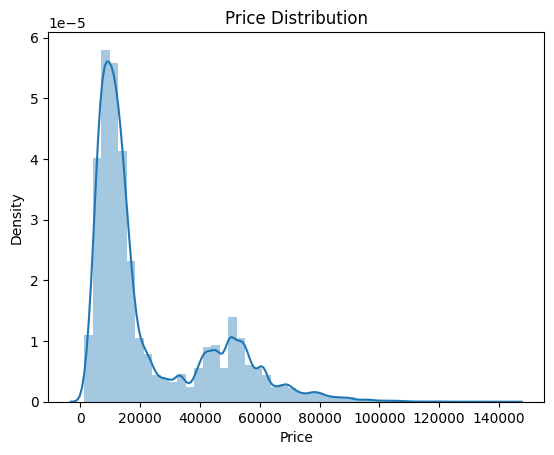

In [ ]:
sns.distplot(df_encoded['Price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [ ]:
x=df_encoded.drop(['Price'],axis=1)
y=df_encoded['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((309789, 17), (132768, 17), (309789,), (132768,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)

with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(mmscaler, f)


x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
print(mmscaler.transform([[2.083333,1.0,1.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0]]))

[[0.0478048  0.33333333 0.25       0.42857143 1.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.130106,0.666667,0.25,0.142857,0.714286,0.959184,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
1,0.160624,0.666667,0.25,0.142857,0.000000,0.387755,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
2,0.439881,0.666667,0.25,0.000000,0.142857,0.408163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
3,0.281092,0.666667,0.75,0.142857,0.571429,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
4,0.145250,0.666667,0.25,1.000000,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309784,0.619550,1.000000,0.25,0.428571,0.000000,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
309785,0.560349,0.666667,0.50,0.285714,0.142857,0.795918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
309786,0.390087,0.666667,0.50,0.714286,0.142857,0.224490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
309787,0.252409,1.000000,0.25,0.571429,0.857143,0.326531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[]  ,'Mean_Squared_Error_MSE':[]  ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()


,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score


In [ ]:
from tqdm import tqdm_notebook


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

import xgboost as xgb

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

In [ ]:

model = RandomForestRegressor()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)
print('------------------------------------------------------------------------------------------------------------')


with open('RF_regressor.pkl', 'wb') as f:
    pickle.dump(model, f)
      #------------------------------------------------------------

Mean Absolute Error (MAE): 2629.429
Mean Squared Error (MSE): 29942095.547
Root Mean Squared Error (RMSE): 5471.937
R2_score: 0.927429
Adj R Square:  0.927426
------------------------------------------------------------------------------------------------------------


In [ ]:
depths = [estimator.tree_.max_depth for estimator in model.estimators_]

print("Depth of each tree in the RandomForestRegressor:")
for i, depth in enumerate(depths):
    print(f"Tree {i+1}: {depth}")

# Optionally, print the average depth
print(f"Average depth: {sum(depths)/len(depths)}")


Depth of each tree in the RandomForestRegressor:
Tree 1: 43
Tree 2: 42
Tree 3: 41
Tree 4: 43
Tree 5: 47
Tree 6: 44
Tree 7: 43
Tree 8: 43
Tree 9: 41
Tree 10: 43
Tree 11: 44
Tree 12: 42
Tree 13: 43
Tree 14: 44
Tree 15: 46
Tree 16: 44
Tree 17: 43
Tree 18: 42
Tree 19: 44
Tree 20: 44
Tree 21: 42
Tree 22: 43
Tree 23: 43
Tree 24: 43
Tree 25: 44
Tree 26: 42
Tree 27: 43
Tree 28: 46
Tree 29: 42
Tree 30: 43
Tree 31: 45
Tree 32: 42
Tree 33: 41
Tree 34: 43
Tree 35: 43
Tree 36: 41
Tree 37: 46
Tree 38: 45
Tree 39: 41
Tree 40: 42
Tree 41: 48
Tree 42: 43
Tree 43: 42
Tree 44: 43
Tree 45: 41
Tree 46: 43
Tree 47: 45
Tree 48: 43
Tree 49: 44
Tree 50: 41
Tree 51: 42
Tree 52: 42
Tree 53: 44
Tree 54: 45
Tree 55: 44
Tree 56: 42
Tree 57: 42
Tree 58: 42
Tree 59: 41
Tree 60: 46
Tree 61: 44
Tree 62: 46
Tree 63: 42
Tree 64: 40
Tree 65: 44
Tree 66: 44
Tree 67: 44
Tree 68: 43
Tree 69: 43
Tree 70: 43
Tree 71: 43
Tree 72: 44
Tree 73: 42
Tree 74: 41
Tree 75: 45
Tree 76: 42
Tree 77: 45
Tree 78: 42
Tree 79: 44
Tree 80: 44


In [ ]:
model2 = xgb.XGBRegressor()

model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)
print('------------------------------------------------------------------------------------------------------------')


with open('RF_regressor2.pkl', 'wb') as f:
    pickle.dump(model2, f)
      #------------------------------------------------------------

Mean Absolute Error (MAE): 3488.112
Mean Squared Error (MSE): 36312539.503
Root Mean Squared Error (RMSE): 6025.989
R2_score: 0.911989
Adj R Square:  0.911986
------------------------------------------------------------------------------------------------------------


In [ ]:
import xgboost as xgb

# Assuming model is your trained XGBRegressor or XGBClassifier
model2.save_model('xgb_model.json')


In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.130019,0.666667,0.25,0.142857,0.714286,0.959184,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
1,0.160612,0.666667,0.25,0.142857,0.000000,0.387755,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
2,0.439771,0.666667,0.25,0.000000,0.142857,0.408163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
3,0.281071,0.666667,0.75,0.142857,0.571429,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
4,0.145315,0.666667,0.25,1.000000,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309784,0.619503,1.000000,0.25,0.428571,0.000000,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
309785,0.560229,0.666667,0.50,0.285714,0.142857,0.795918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
309786,0.390057,0.666667,0.50,0.714286,0.142857,0.224490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
309787,0.252390,1.000000,0.25,0.571429,0.857143,0.326531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [ ]:
modelmlg = LinearRegression()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()

modelSVR = SVR()

modelXGR = xgb.XGBRegressor()

modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelETR, modelGBR, modelXGR, modelRE, modelLO,modelrfr]

for models in tqdm_notebook(MM):

    models.fit(x_train, y_train)
    y_pred = models.predict(x_test)

    print('Model Name: ', models)




    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')


    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'R2_score' : metrics.r2_score(y_test, y_pred)}

    new_row_df = pd.DataFrame([new_row])
    Results = pd.concat([Results, new_row_df], ignore_index=True)
    #------------------------------------------------------------

<ipython-input-69-a896054bf44d>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for models in tqdm_notebook(MM):


  0%|          | 0/8 [00:00<?, ?it/s]

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 7151.488
Mean Squared Error (MSE): 108151064.86
Root Mean Squared Error (RMSE): 10399.57
R2_score: 0.737872
Root Mean Squared Log Error (RMSLE): 9.25
Adj R Square:  0.737862
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 3093.566
Mean Squared Error (MSE): 51655112.105
Root Mean Squared Error (RMSE): 7187.149
R2_score: 0.874802
Root Mean Squared Log Error (RMSLE): 8.88
Adj R Square:  0.874797
------------------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 2807.823
Mean Squared Error (MSE): 34568325.952
Root Mean Squared Error (RMSE): 5879.483
R2_score: 0.916216
Root Mean Squared Log Error (RMSLE): 8.679
Adj R Square:  0.916213
--------------------------------------------------------------------------

In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),7151.487742,0.737862,10399.570417,43.177256,1.081511e+08,9.249520,0.737872
1,DecisionTreeRegressor(),3093.566305,0.874797,7187.149094,14.891014,5.165511e+07,8.880050,0.874802
2,"(ExtraTreeRegressor(random_state=819695216), E...",2807.823103,0.916213,5879.483477,13.885754,3.456833e+07,8.679224,0.916216
3,([DecisionTreeRegressor(criterion='friedman_ms...,4316.585198,0.877496,7109.271920,23.855179,5.054175e+07,8.869155,0.877501
4,"XGBRegressor(base_score=None, booster=None, ca...",3488.112177,0.911986,6025.988674,18.480196,3.631254e+07,8.703837,0.911989
5,Ridge(),7151.168854,0.737862,10399.564575,43.173880,1.081509e+08,9.249519,0.737872
6,Lasso(alpha=0.1),7151.233690,0.737861,10399.599702,43.173634,1.081517e+08,9.249523,0.737871
7,"(DecisionTreeRegressor(max_features=1.0, rando...",2627.460888,0.927530,5468.023525,12.902184,2.989928e+07,8.606673,0.927533


In [ ]:
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

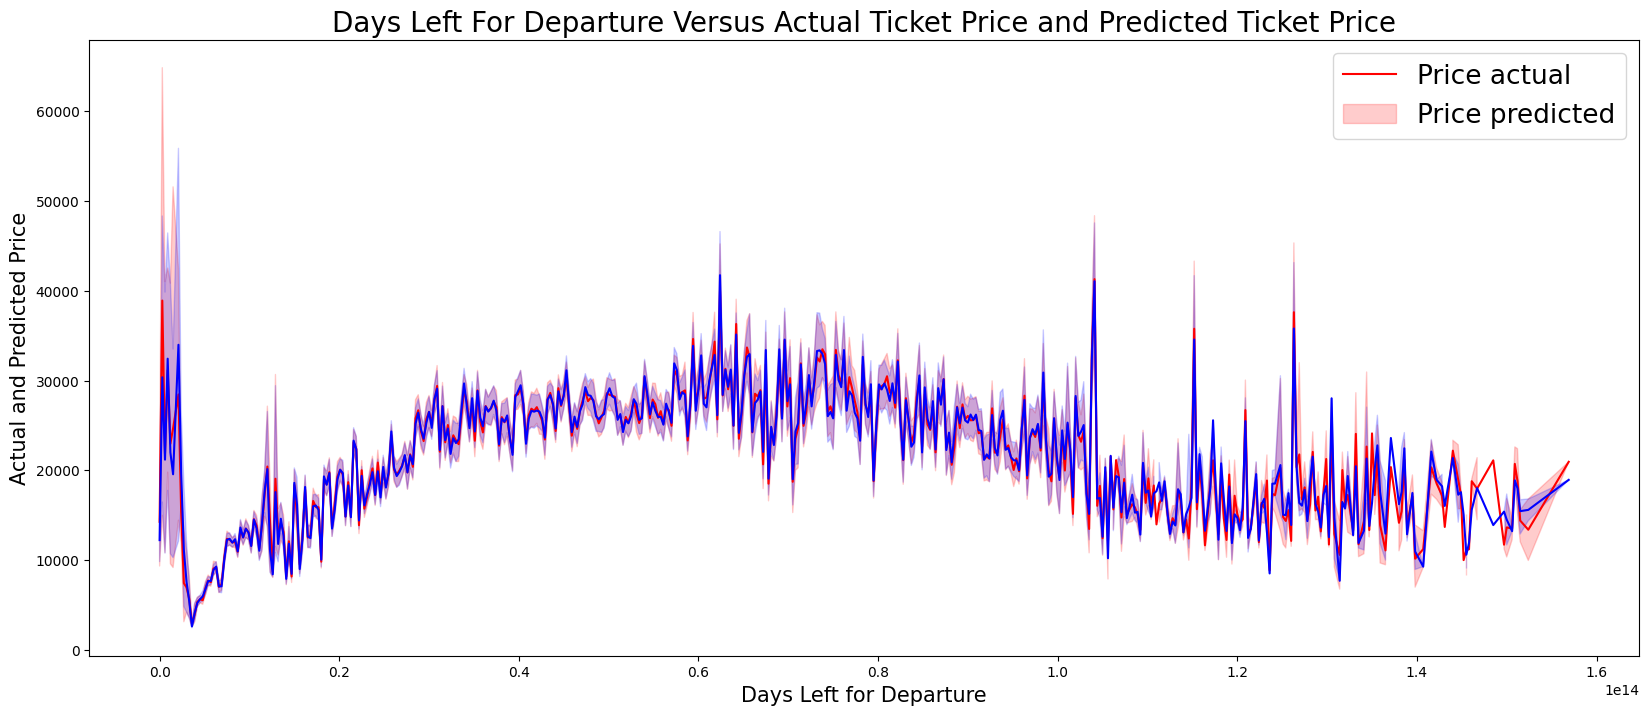

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='Duration',y='Price_actual',color='red')
sns.lineplot(data=result,x='Duration',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()



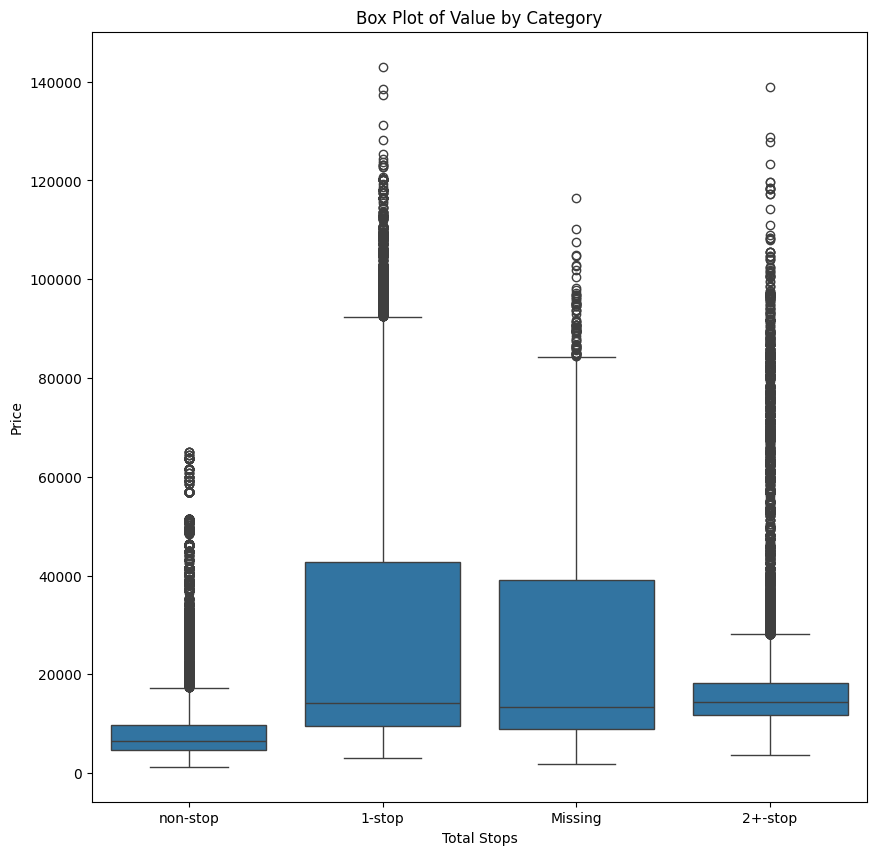

In [ ]:
plt.figure(figsize=(10, 10))

sns.boxplot(x='Total Stops', y='Price', data=df)

plt.title('Box Plot of Value by Category')
plt.xlabel('Total Stops')
plt.ylabel('Price')

plt.show()

<ipython-input-60-6d3697ad2a7f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Stops', y='Price', data=df, estimator='mean', ci=None)


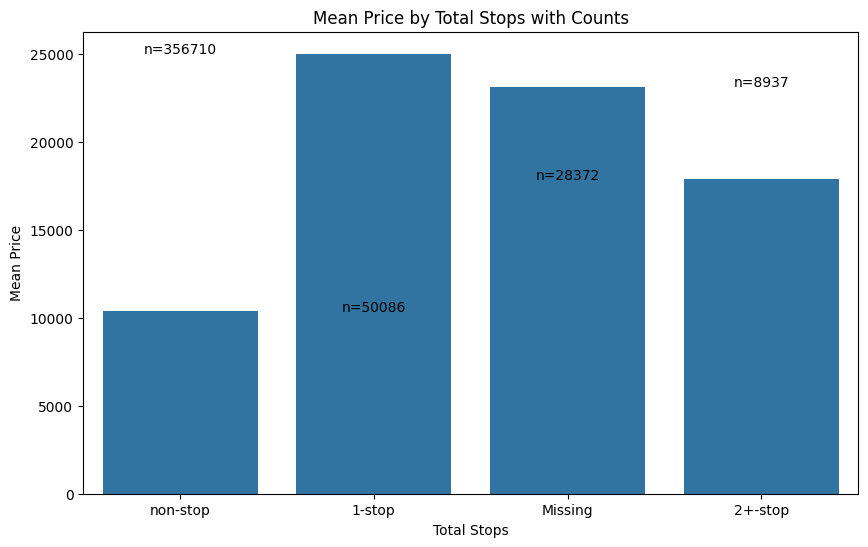

In [ ]:
plt.figure(figsize=(10, 6))

# Create a bar plot to show the mean Value for each Category
sns.barplot(x='Total Stops', y='Price', data=df, estimator='mean', ci=None)

# Add count annotations on top of bars
category_counts = df['Total Stops'].value_counts()
for idx, count in enumerate(category_counts):
    plt.text(idx, df[df['Total Stops'] == category_counts.index[idx]]['Price'].mean(), f'n={count}', color='black', ha="center")

# Add title and labels
plt.title('Mean Price by Total Stops with Counts')
plt.xlabel('Total Stops')
plt.ylabel('Mean Price')

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

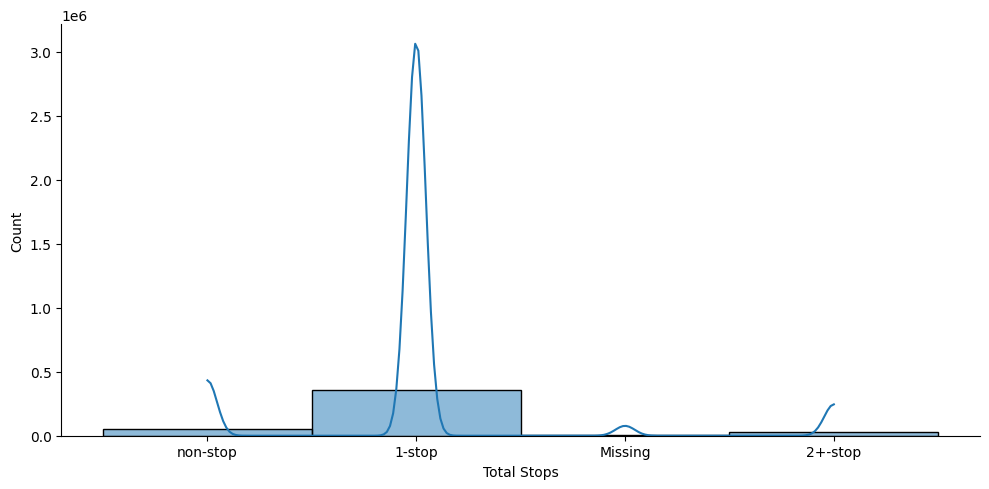

In [ ]:
plt.figure(figsize=(12, 8))
sns.displot(df['Total Stops'], kde=True,aspect=2)
plt.show()

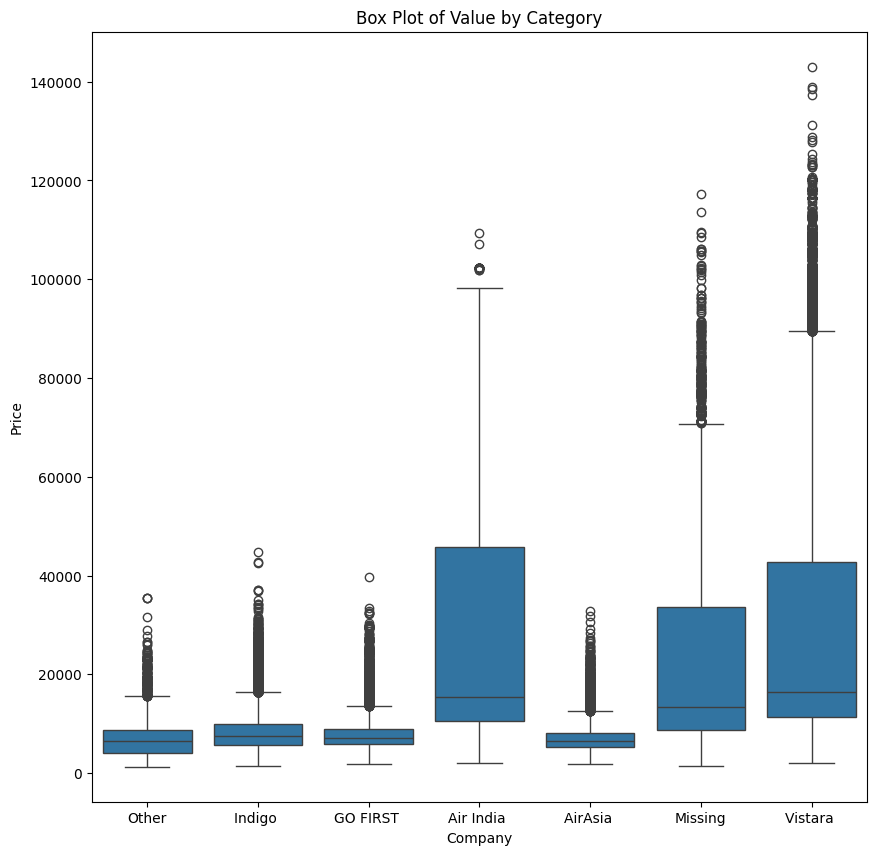

In [ ]:
plt.figure(figsize=(10, 10))

sns.boxplot(x='Company', y='Price', data=df)

plt.title('Box Plot of Value by Category')
plt.xlabel('Company')
plt.ylabel('Price')

plt.show()

<ipython-input-66-f134cf249113>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='Price', data=df, estimator='mean', ci=None)


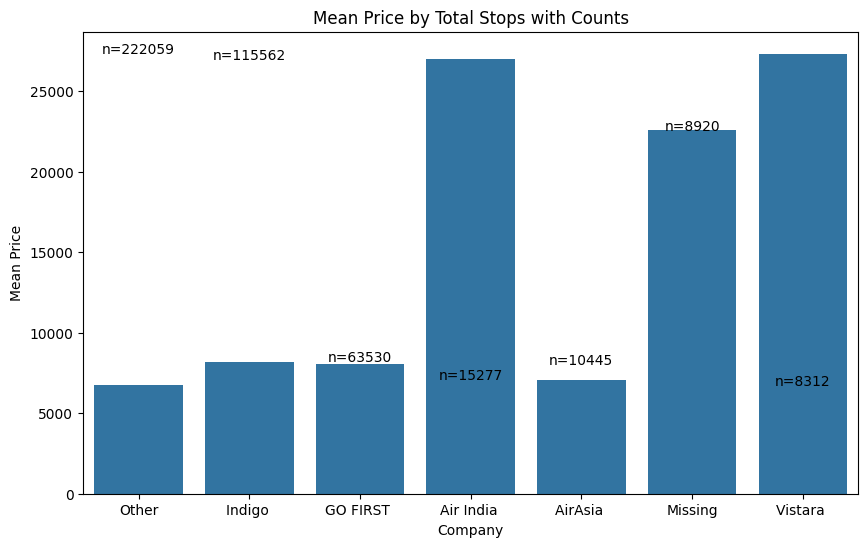

In [ ]:
plt.figure(figsize=(10, 6))

# Create a bar plot to show the mean Value for each Category
sns.barplot(x='Company', y='Price', data=df, estimator='mean', ci=None)

# Add count annotations on top of bars
category_counts = df['Company'].value_counts()
for idx, count in enumerate(category_counts):
    plt.text(idx, df[df['Company'] == category_counts.index[idx]]['Price'].mean(), f'n={count}', color='black', ha="center")

# Add title and labels
plt.title('Mean Price by Total Stops with Counts')
plt.xlabel('Company')
plt.ylabel('Mean Price')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

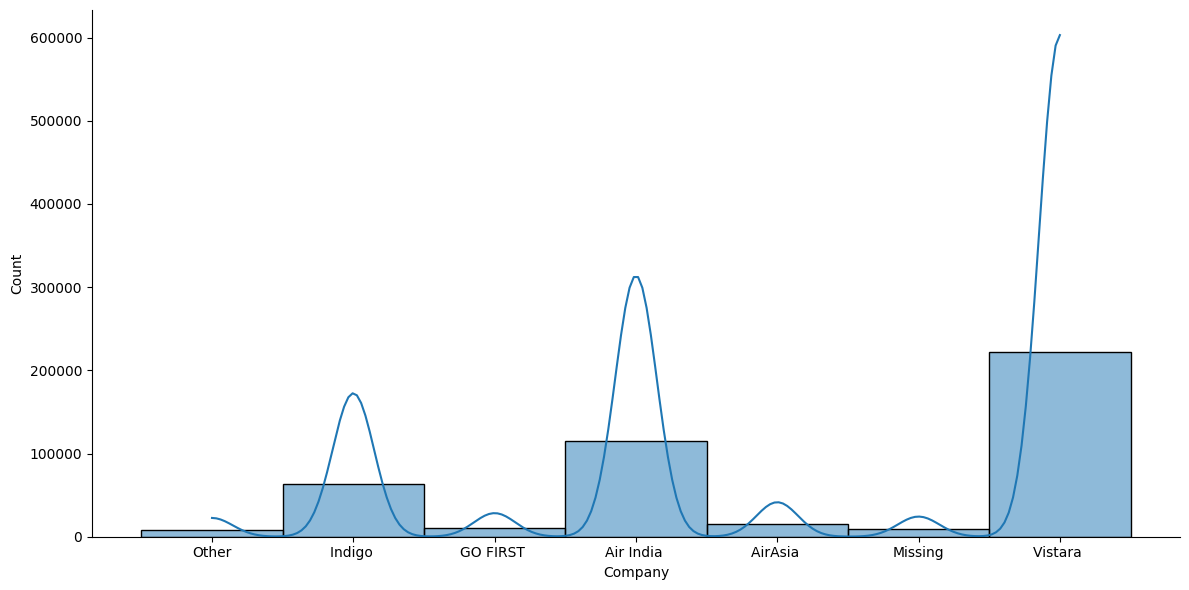

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(df['Company'], kde=True,height=6,aspect=2)
plt.show()

In [ ]:
df.columns

Index(['Duration', 'Total Stops', 'Price', 'Company', 'Flight_Route',
       'Ticket_Class', 'Departure_Location', 'Departure_Time',
       'Arrival_Location', 'Arrival_Time', 'Day_interval'],
      dtype='object')

In [ ]:
df.isna().sum()

Duration              8926
Total Stops              0
Price                    0
Company                  0
Flight_Route          8920
Ticket_Class          8920
Departure_Location    8918
Departure_Time        8918
Arrival_Location      8922
Arrival_Time          8922
Day_interval             0
dtype: int64

<Figure size 900x600 with 0 Axes>

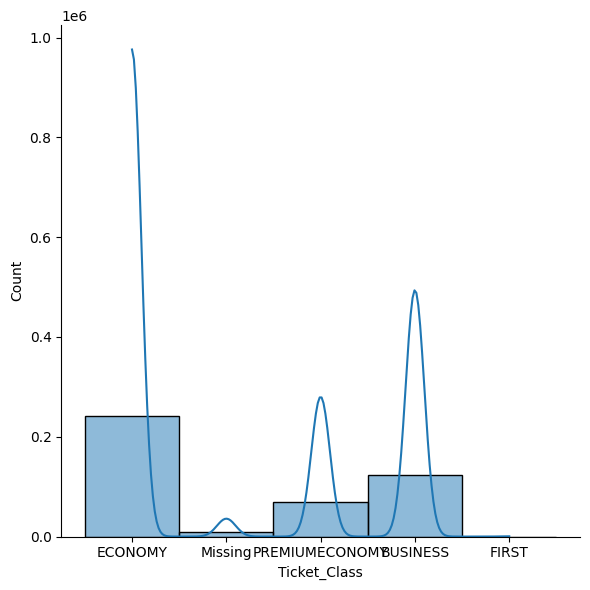

In [ ]:
plt.figure(figsize=(9, 6))
sns.displot(df['Ticket_Class'], kde=True,height=6)
plt.show()

<ipython-input-80-a12fa93511a5>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ticket_Class', y='Price', data=df, estimator='mean', ci=None)


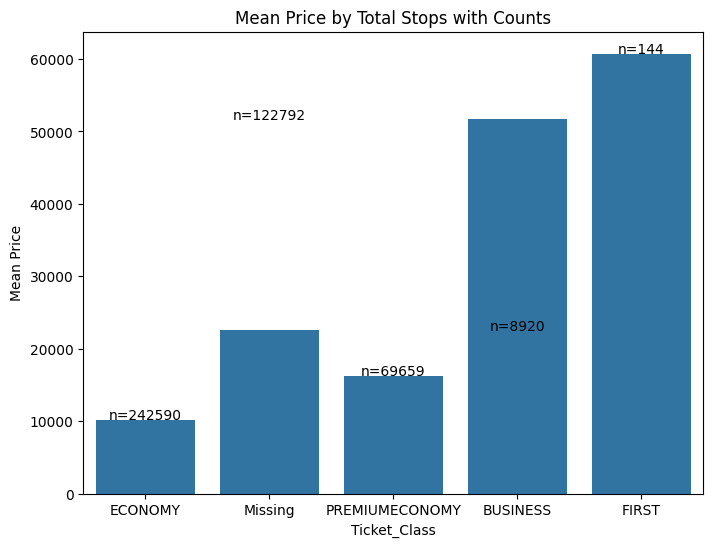

In [ ]:
plt.figure(figsize=(8, 6))

# Create a bar plot to show the mean Value for each Category
sns.barplot(x='Ticket_Class', y='Price', data=df, estimator='mean', ci=None)

# Add count annotations on top of bars
category_counts = df['Ticket_Class'].value_counts()
for idx, count in enumerate(category_counts):
    plt.text(idx, df[df['Ticket_Class'] == category_counts.index[idx]]['Price'].mean(), f'n={count}', color='black', ha="center")

plt.title('Mean Price by Total Stops with Counts')
plt.xlabel('Ticket_Class')
plt.ylabel('Mean Price')

plt.show()

     Arrival_Time  Percentage
0           19:50    3.035600
1    Arrival_Time    1.995121
2           22:40    1.741172
3           09:40    1.627985
4           19:55    1.589292
..            ...         ...
262         05:25    0.005782
263         06:30    0.003336
264         02:55    0.003113
265         05:15    0.000445
266         23:59    0.000222

[267 rows x 2 columns]


In [ ]:

# Rename columns
rename_dict = {
    "Departure Time": "Departure_Time",
    "Arrival Time": "Arrival_Time",
    "Total Stops": "Total_Stops",
    "Flight Route": "Flight_Route",
    "Ticket Class": "Ticket_Class"
    # ,"Departure Location": "Departure_Location",
    # "Arrival Location": "Arrival_Location"
}

df.rename(columns=rename_dict, inplace=True)

# Split columns and extract parts
df["Company"] = df["Airline-Class"].str.split("\n").str[0]
df["Flight_Route"] = df["Airline-Class"].str.split("\n").str[1]
df["Ticket_Class"] = df["Airline-Class"].str.split("\n").str[2]
df["Departure_Location"] = df["Departure_Time"].str.split("\n").str[1]
df["Departure_Time"] = df["Departure_Time"].str.split("\n").str[0]
df["Arrival_Location"] = df["Arrival_Time"].str.split("\n").str[1]
df["Arrival_Time"] = df["Arrival_Time"].str.split("\n").str[0]

# Drop unnecessary columns and handle NaN values
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(subset=["Price"], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

print(df.columns)
print(df)